In [ ]:
import numpy as np
import pandas as pd

# 特征缩放
def feature_scaling(X):
    return X.apply(lambda column: (column - column.mean()) / column.std())

加载数据

In [ ]:
# 加载数据
def load_and_preprocess_data():
    df = pd.read_csv(filepath_or_buffer='dataFile/ex2data1.txt', names=['text1', 'text2', 'lable'])

    X = df.iloc[:, 0:2]
    y = df.iloc[:, 2]
    # X = feature_scaling(X)
    X.insert(0, 'ones', 1)
    X = np.matrix(X)
    y = np.matrix(y).T
    theta = np.matrix(np.zeros(X.shape[1]))
    return X, y, df, theta

sigmoid 函数
$$
\sigma(x) = \frac{1}{1 + e^{-x}}\tag{1}
$$

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

代价函数
$$
J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)} \log(h_\theta(x^{(i)})) - (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
\tag{2}
$$

In [ ]:
# 计算代价函数
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta.T))
    J = (1 / m) * (np.sum(-np.log(h).T.dot(y) - np.log(1 - h).T.dot(1 - y)))
    return J

逻辑回归模型的假设函数
$$
\begin{align}
h_\theta(x) &= \sigma(\theta^T x)\tag{3} \\
&= \frac{1}{1 + e^{-\theta^T x}}\tag{4}
\end{align}\\
$$

逻辑回归的梯度下降函数
$$
\begin{align}
\theta_j &= \theta_j - \frac{\alpha}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}\tag{5}
\end{align}
$$

In [1]:
# 梯度下降算法
def gradient_descent(X, y, theta):
    m = len(y)
    theta = theta - (1 / m) * np.dot((sigmoid(np.dot(X, theta.T)) - y).T, X)
    return theta

这里返回一次的梯度下降结果

下载使用sklearn里的逻辑回归模型

[[0.20535491 0.2005838 ]]


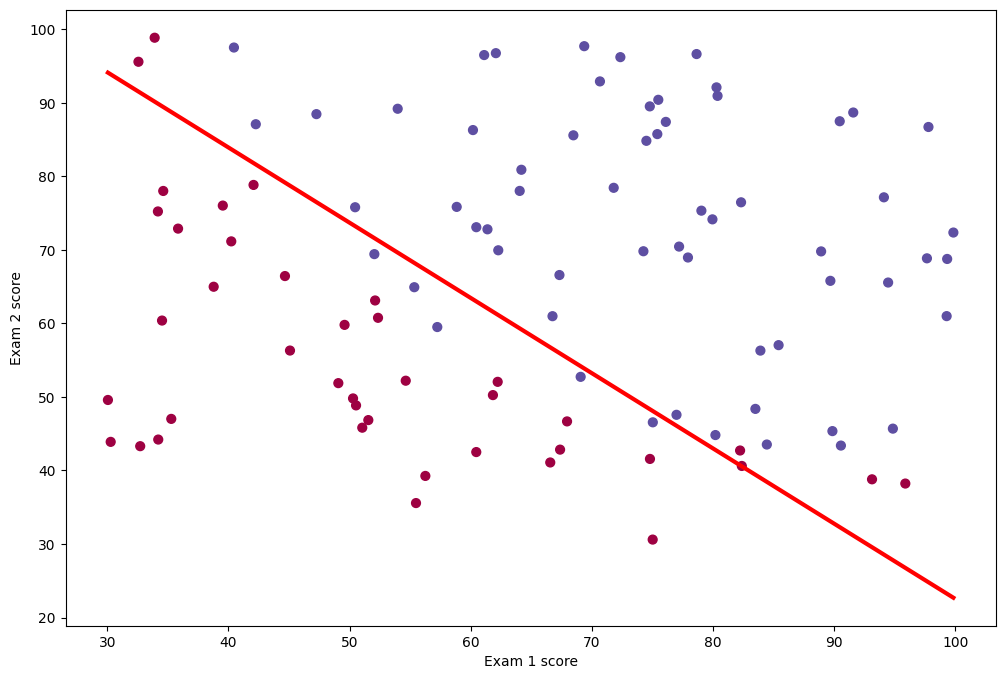

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd


df = pd.read_csv(filepath_or_buffer='dataFile/ex2data1.txt', names=['text1', 'text2', 'lable'])
X = df.iloc[:, 0:2]
y = df.iloc[:, 2]
X = np.array(X)
y = np.array(y).reshape(y.shape[0],)
lr_model = LogisticRegression()
lr_model.fit(X, y)
print(lr_model.coef_)
x0 = np.linspace(df['text1'].min(), df['text1'].max(), 100)
x1 = (-1 / lr_model.coef_[0][1]) * (lr_model.coef_[0][0] * x0 + lr_model.intercept_)
# 打印图像
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df['text1'], df['text2'], c=df['lable'], s=40, cmap=plt.cm.Spectral)
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.plot(x0, x1, color='red', linewidth=3)
plt.show()